# **Analysis and Prediction of Drug Experimentation among Adolescents**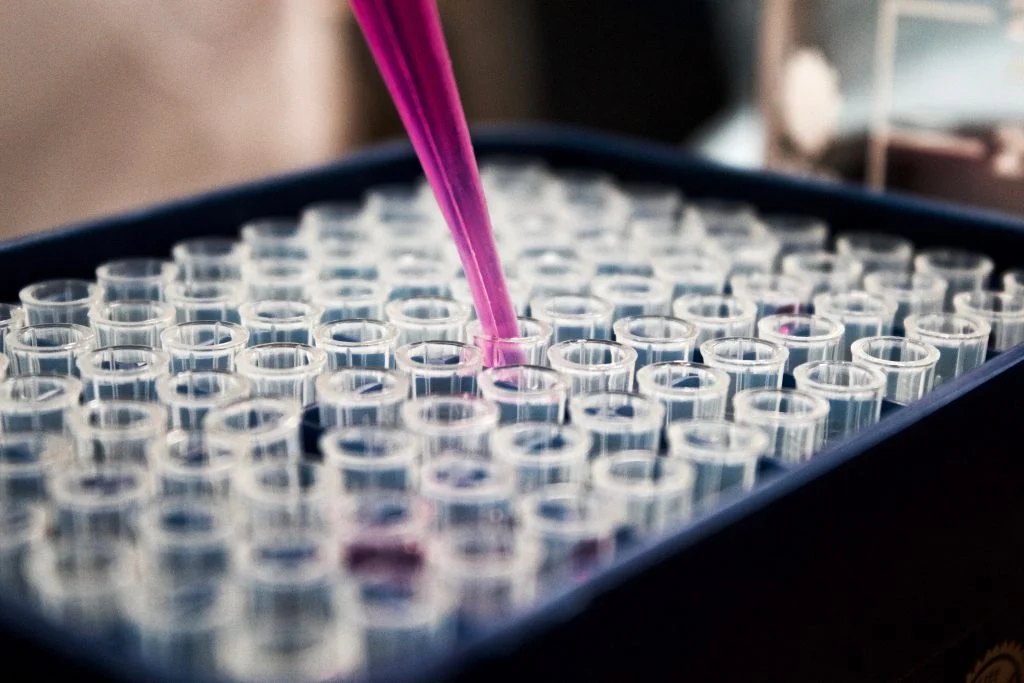
                                     Done By
                                      Tanish Prejesh P
                                     B.Tech(AI&DS)-III-Year

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1**. Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# 2.**Importing** **Data**

In [ ]:
data = pd.read_csv("/content/DATA SET.csv")
df=pd.DataFrame(data)
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df.describe()

,Year,Smoking_Prevalence,Drug_Experimentation,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.000500,27.439257,40.150182,5.440100,5.513300,5.469800,5.528000,5.544600,5.506200
std,1.425027,12.975528,17.515917,2.863151,2.865038,2.879326,2.891514,2.870302,2.872836
min,2020.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,16.160000,24.920000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2022.000000,27.355000,40.100000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2023.000000,38.672500,55.462500,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,2024.000000,50.000000,69.990000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.isnull().sum()

,0
Year,0
Age_Group,0
Gender,0
Smoking_Prevalence,0
Drug_Experimentation,0
Socioeconomic_Status,0
Peer_Influence,0
School_Programs,0
Family_Background,0
Mental_Health,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# **3.One Hot Encoding**

In [ ]:
# handle_unknown='ignore' to handle unseen values during prediction
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
# Assuming your DataFrame is named 'df' and categorical columns are in a list called 'categorical_cols'
categorical_cols = ['Gender', 'Socioeconomic_Status', 'School_Programs', 'Access_to_Counseling', 'Substance_Education']

encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame with the encoded features:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original DataFrame:
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns:
df = df.drop(categorical_cols, axis=1)

In [ ]:
print(df_encoded.dtypes)

Year                             int64
Age_Group                       object
Smoking_Prevalence             float64
Drug_Experimentation           float64
Peer_Influence                   int64
Family_Background                int64
Mental_Health                    int64
Parental_Supervision             int64
Community_Support                int64
Media_Influence                  int64
Gender_Both                       bool
Gender_Female                     bool
Gender_Male                       bool
Socioeconomic_Status_High         bool
Socioeconomic_Status_Low          bool
Socioeconomic_Status_Middle       bool
School_Programs_No                bool
School_Programs_Yes               bool
Access_to_Counseling_No           bool
Access_to_Counseling_Yes          bool
Substance_Education_No            bool
Substance_Education_Yes           bool
dtype: object


In [ ]:
x=df.drop('Drug_Experimentation',axis=1)
y=df['Drug_Experimentation']
x

,Year,Age_Group,Smoking_Prevalence,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence,Gender_Both,...,Gender_Male,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,School_Programs_No,School_Programs_Yes,Access_to_Counseling_No,Access_to_Counseling_Yes,Substance_Education_No,Substance_Education_Yes
0,2024,15-19,18.85,5,1,5,4,3,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2024,10-14,34.88,6,10,5,9,9,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2023,10-14,42.00,6,2,7,2,5,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2024,40-49,33.75,10,9,7,2,10,9,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,2023,15-19,47.90,1,2,4,4,10,3,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023,15-19,49.17,7,4,5,7,2,9,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9996,2020,80+,48.00,8,8,8,4,8,9,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
9997,2021,25-29,47.62,1,7,2,1,5,10,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9998,2022,40-49,9.37,7,10,1,2,10,4,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# **4**. Removing Outliers:

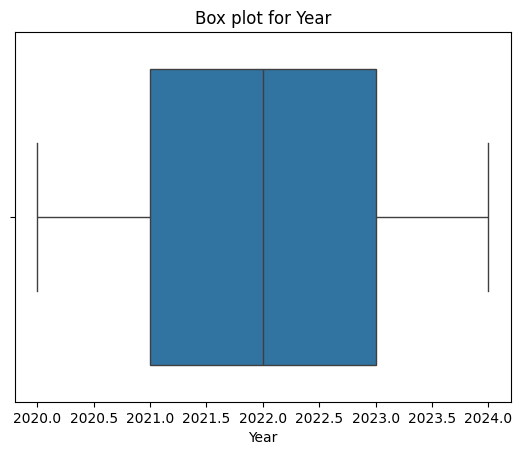

In [ ]:
#Finding outliers for year using boxplot
sns.boxplot(x=df["Year"])
plt.title("Box plot for Year")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


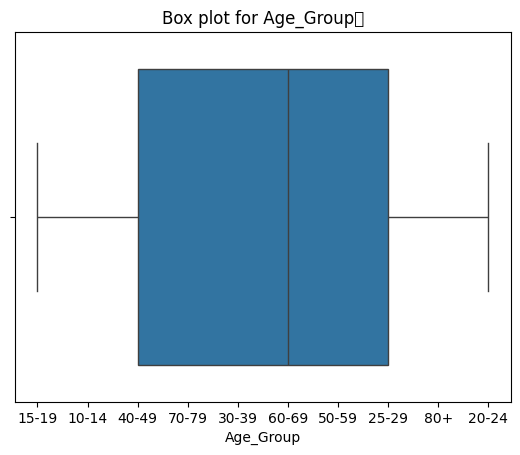

In [ ]:
sns.boxplot(x=df["Age_Group"])
plt.title("Box plot for Age_Group	")
plt.show()

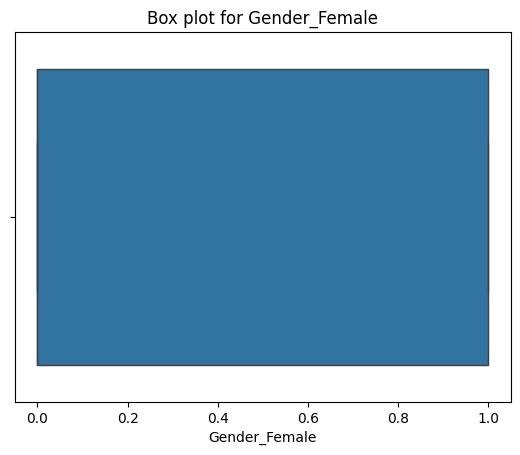

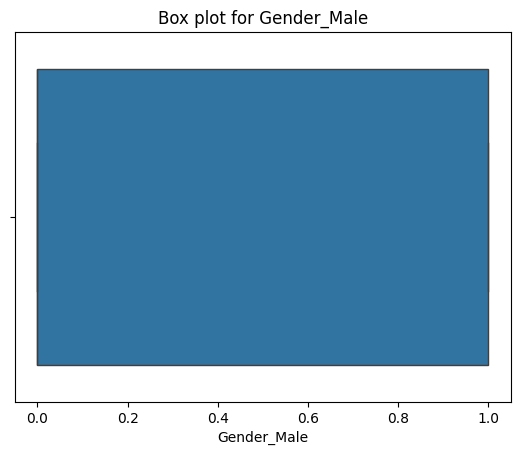

In [ ]:
# Assuming 'encoded_df' contains the one-hot encoded column
sns.boxplot(x=encoded_df["Gender_Female"])
plt.title("Box plot for Gender_Female")
plt.show()

sns.boxplot(x=encoded_df["Gender_Male"])
plt.title("Box plot for Gender_Male")
plt.show()

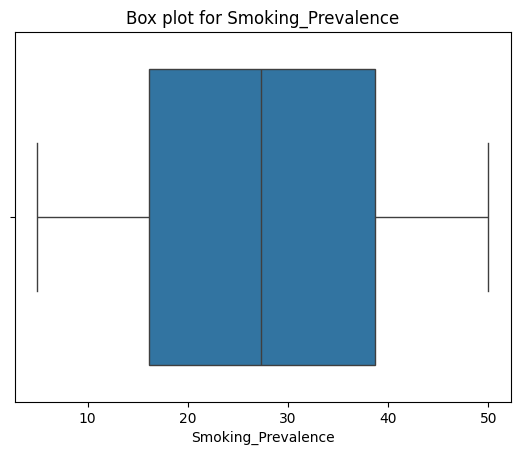

In [ ]:
sns.boxplot(x=df["Smoking_Prevalence"])
plt.title("Box plot for Smoking_Prevalence")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


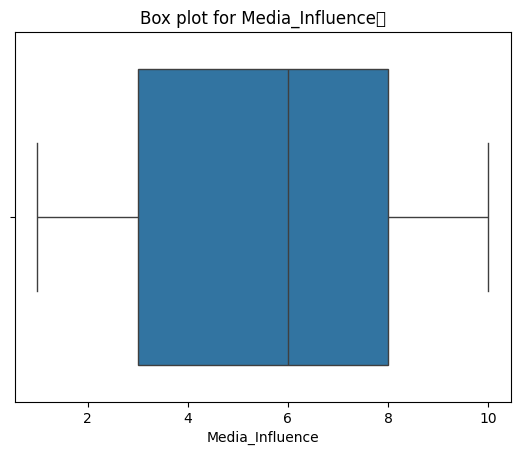

In [ ]:
sns.boxplot(x=df["Media_Influence"])
plt.title("Box plot for Media_Influence	")
plt.show()

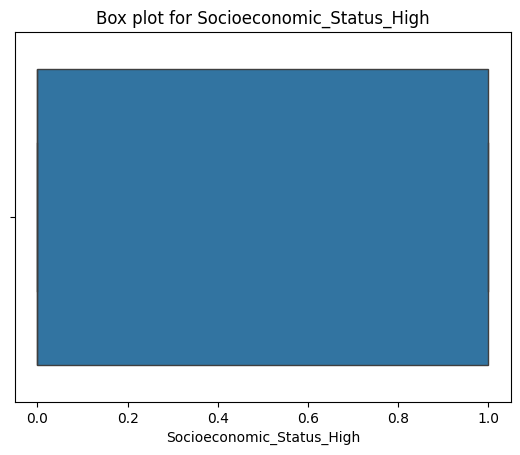

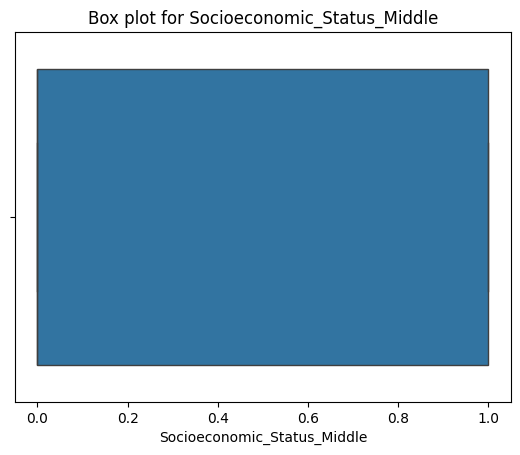

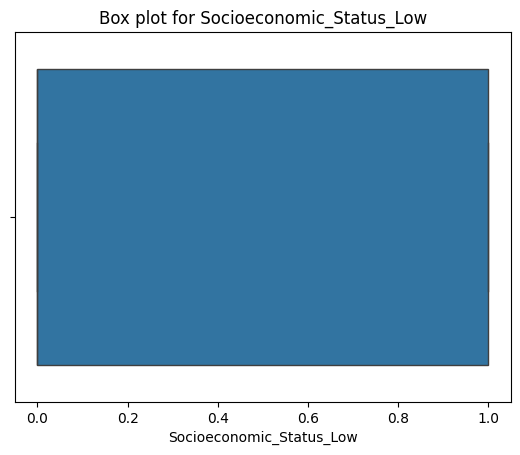

In [ ]:
#Instead of:
#sns.boxplot(x=encoded_df["Socioeconomic_Status_" + df['Socioeconomic_Status'][0]])

#Get the unique values from original dataframe before dropping
socioeconomic_status_unique = data['Socioeconomic_Status'].unique()

#Iterate to plot for each category
for status in socioeconomic_status_unique:
    sns.boxplot(x=encoded_df["Socioeconomic_Status_" + status])
    plt.title("Box plot for Socioeconomic_Status_" + status)
    plt.show()

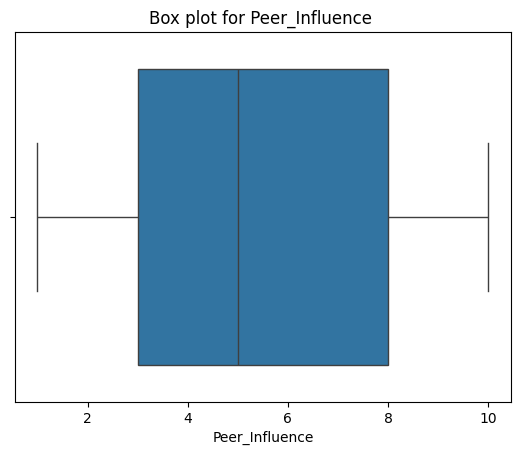

In [ ]:
sns.boxplot(x=df["Peer_Influence"])
plt.title("Box plot for Peer_Influence ")
plt.show()

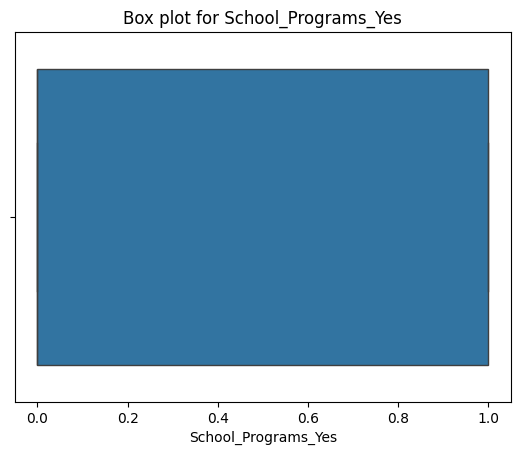

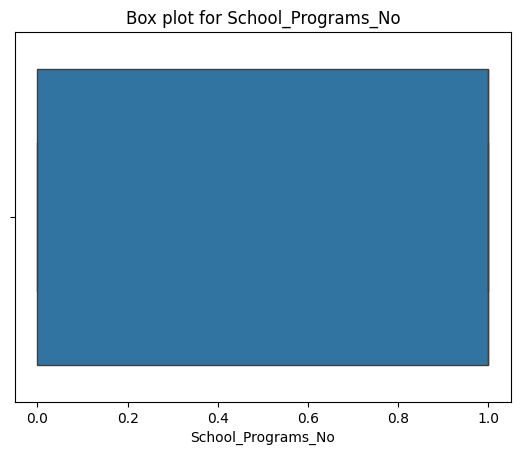

In [ ]:
# Instead of using the original 'df', use 'encoded_df' for the encoded columns
# Get the unique values from original dataframe before dropping
school_programs_unique = data['School_Programs'].unique()

# Iterate to plot for each category
for program in school_programs_unique:
    sns.boxplot(x=encoded_df["School_Programs_" + program])
    plt.title("Box plot for School_Programs_" + program)
    plt.show()

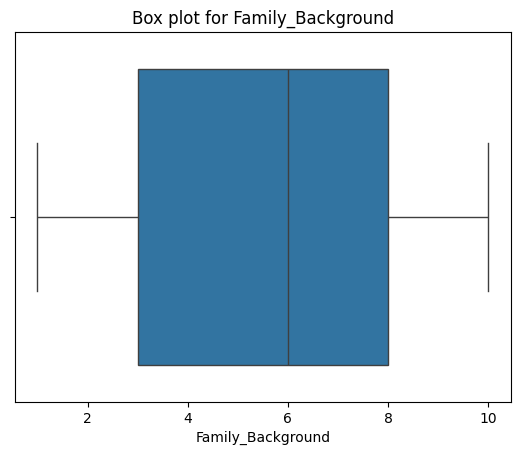

In [ ]:
sns.boxplot(x=df["Family_Background"])
plt.title("Box plot for Family_Background")
plt.show()

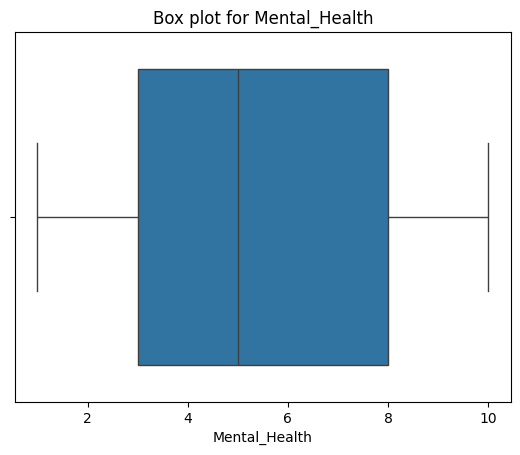

In [ ]:
sns.boxplot(x=df["Mental_Health"])
plt.title("Box plot for Mental_Health")
plt.show()

In [ ]:
# Create a copy for outlier removal:
# df_for_outlier_removal = df.drop(categorical_cols, axis=1)  # Remove this line

# Instead, if you want to remove outliers only from numeric columns:
df_for_outlier_removal = df.copy()  # Create a copy
numeric_cols = df_for_outlier_removal.select_dtypes(include=np.number).columns.tolist()  # Get numeric column names
df_no_outliers = remove_outliers_iqr(df_for_outlier_removal, numeric_cols)

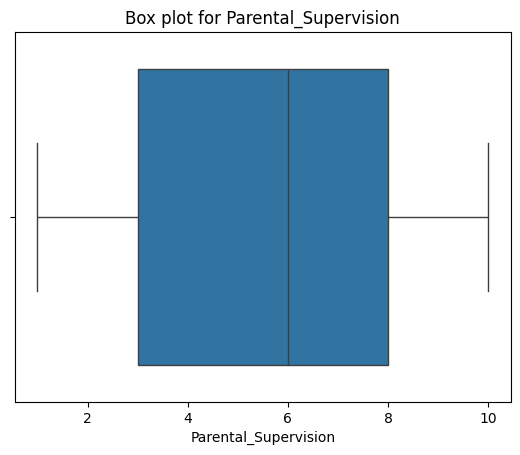

In [ ]:
sns.boxplot(x=df["Parental_Supervision"])
plt.title("Box plot for Parental_Supervision")
plt.show()

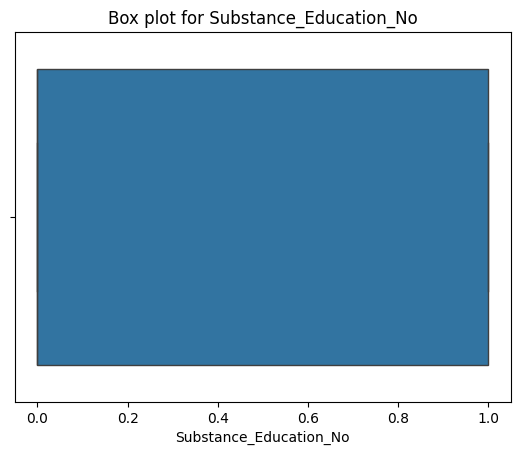

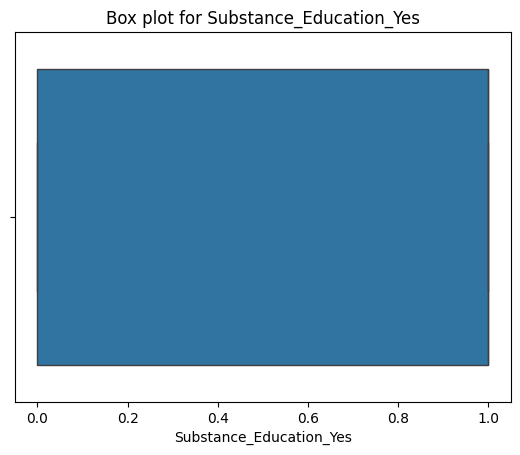

In [ ]:
# Assuming 'encoded_df' contains the one-hot encoded columns

# Instead of using the original 'df', use 'encoded_df' for the encoded columns
# Get the unique values from original dataframe before dropping
substance_education_unique = data['Substance_Education'].unique()

# Iterate to plot for each category
for education in substance_education_unique:
    sns.boxplot(x=encoded_df["Substance_Education_" + education])
    plt.title("Box plot for Substance_Education_" + education)
    plt.show()

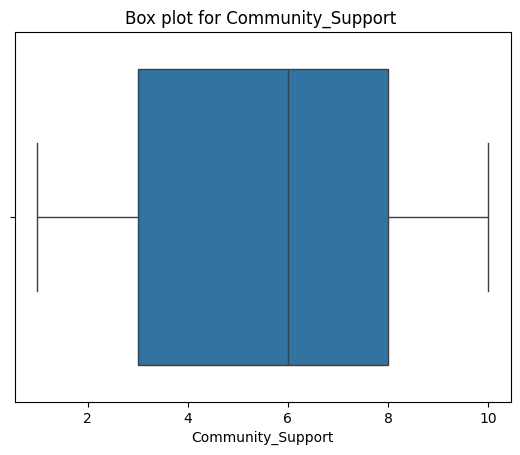

In [ ]:
sns.boxplot(x=df["Community_Support"])
plt.title("Box plot for Community_Support ")
plt.show()

In [ ]:
def remove_outliers_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower) & (dataframe[col] <= upper)]
    return dataframe

numeric_cols = x.select_dtypes(include=np.number).columns
df_no_outliers = remove_outliers_iqr(x, numeric_cols)
df_no_outliers

,Year,Age_Group,Smoking_Prevalence,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence,Gender_Both,...,Gender_Male,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,School_Programs_No,School_Programs_Yes,Access_to_Counseling_No,Access_to_Counseling_Yes,Substance_Education_No,Substance_Education_Yes
0,2024,15-19,18.85,5,1,5,4,3,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2024,10-14,34.88,6,10,5,9,9,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2023,10-14,42.00,6,2,7,2,5,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2024,40-49,33.75,10,9,7,2,10,9,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,2023,15-19,47.90,1,2,4,4,10,3,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023,15-19,49.17,7,4,5,7,2,9,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9996,2020,80+,48.00,8,8,8,4,8,9,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
9997,2021,25-29,47.62,1,7,2,1,5,10,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9998,2022,40-49,9.37,7,10,1,2,10,4,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# **4**. Data Visualization:

<ipython-input-533-ad1c577bc078>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette="Set2", width=0.4)
<ipython-input-533-ad1c577bc078>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette="Set2", width=0.4)
<ipython-input-533-ad1c577bc078>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette="Set2", width=0.4)
<ipython-input-533-ad1c577bc078>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

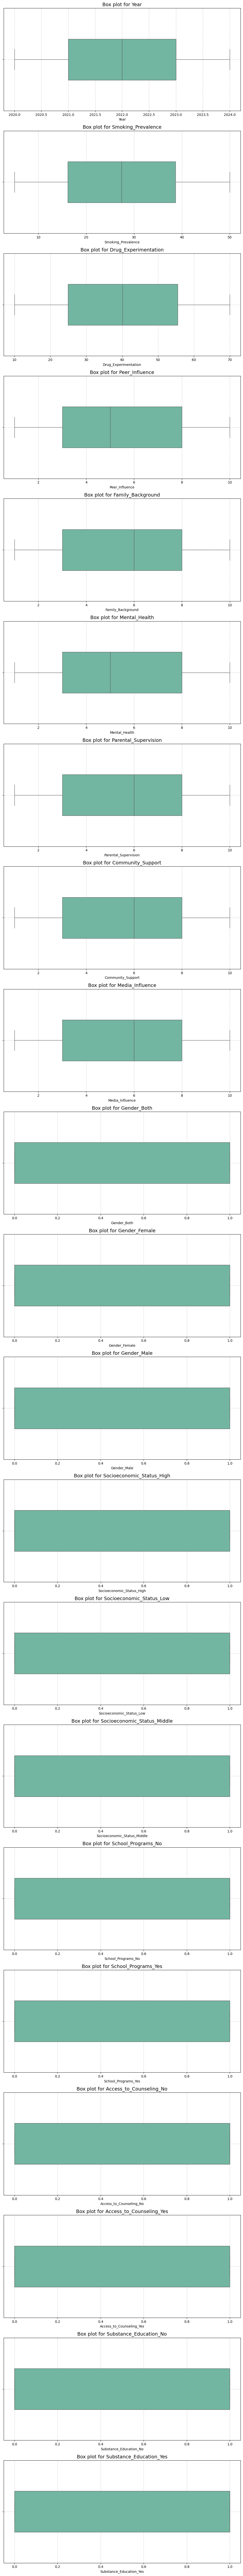

In [ ]:
# Assuming your DataFrame is named 'df'
numeric_cols = df.select_dtypes(include=np.number).columns

# Create subplots for each numeric column
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 5 * len(numeric_cols)))

# Iterate through numeric columns and plot styled box plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], palette="Set2", width=0.4)
    axes[i].set_title(f"Box plot for {col}", fontsize=14)
    axes[i].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-534-6308aecd5744>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data['Age_Group'] = heatmap_data['Age_Group'].map(age_mapping)


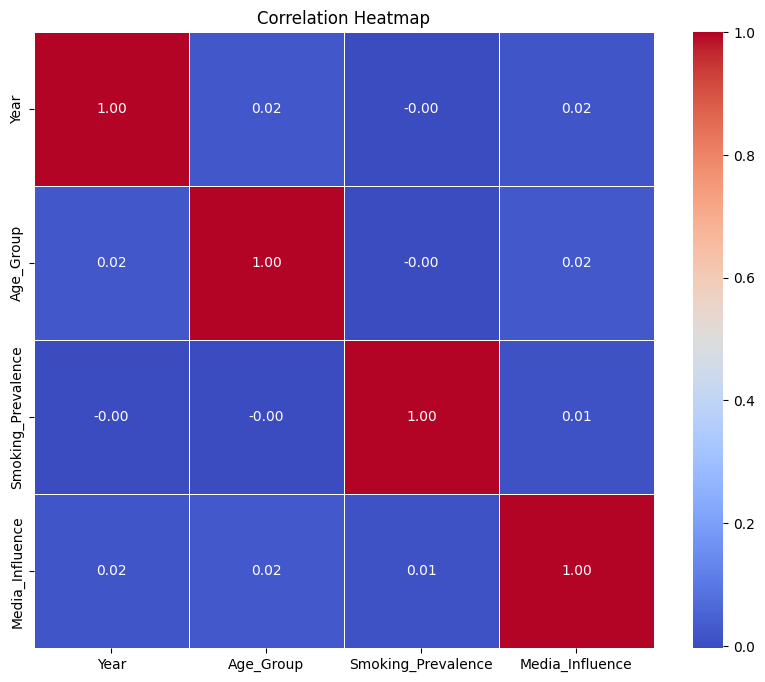

In [ ]:
# Assuming your DataFrame is named 'df'
# Select the columns you want to include in the heatmap
heatmap_data = df[['Year', 'Age_Group', 'Smoking_Prevalence', 'Media_Influence']]

# Convert 'Age_Group' to numeric if it contains string ranges
# You might need to adjust this based on your specific age ranges
# For example, you could map '15-19' to the midpoint 17, '20-24' to 22, etc.
# Create a dictionary for mapping age ranges to numeric values
age_mapping = {
    '15-19': 17,
    '20-24': 22,
    # Add more mappings for other age ranges
}
# Apply the mapping to the 'Age_Group' column
heatmap_data['Age_Group'] = heatmap_data['Age_Group'].map(age_mapping)

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

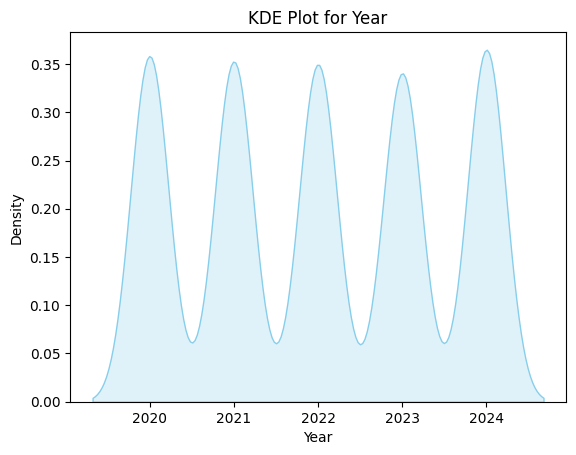

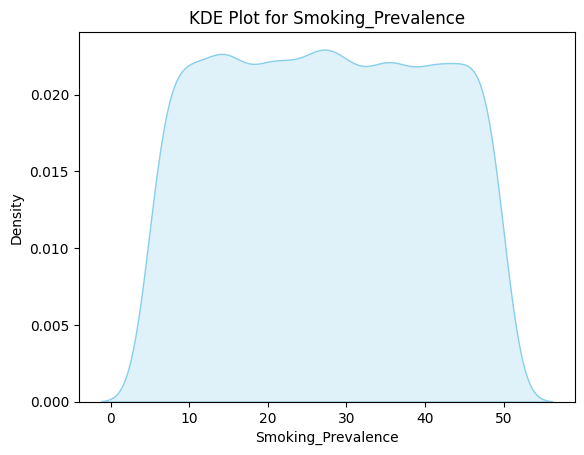

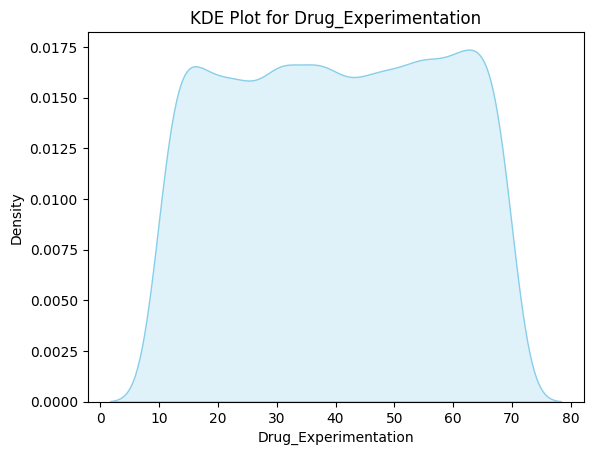

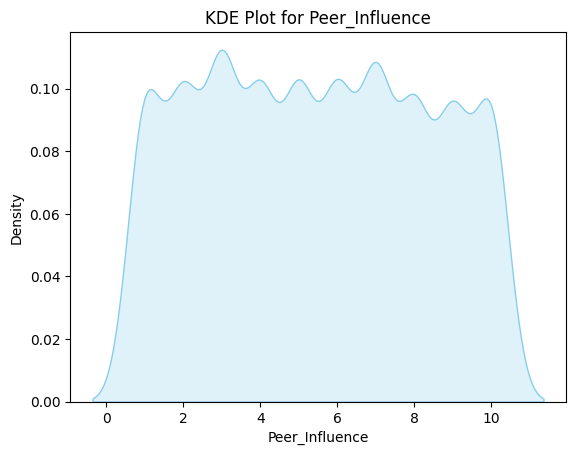

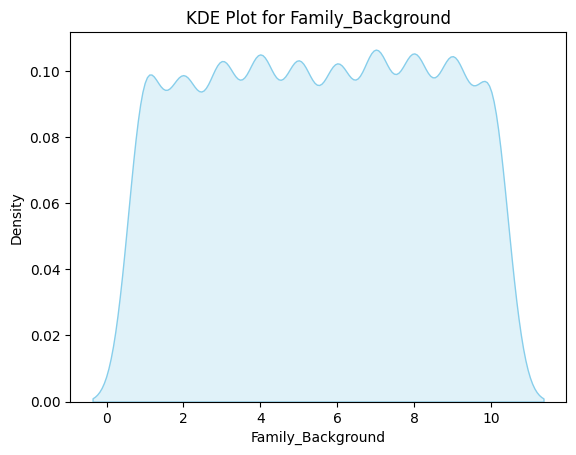

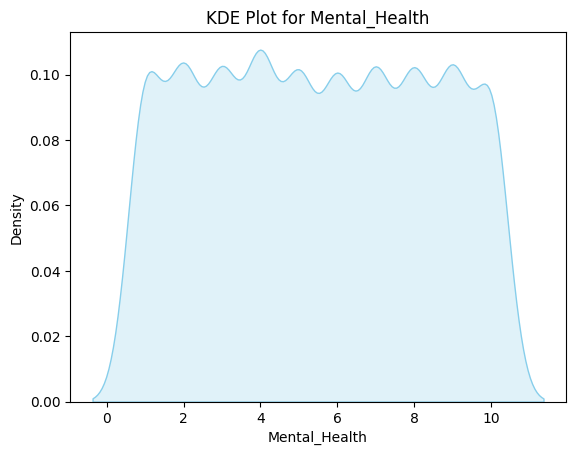

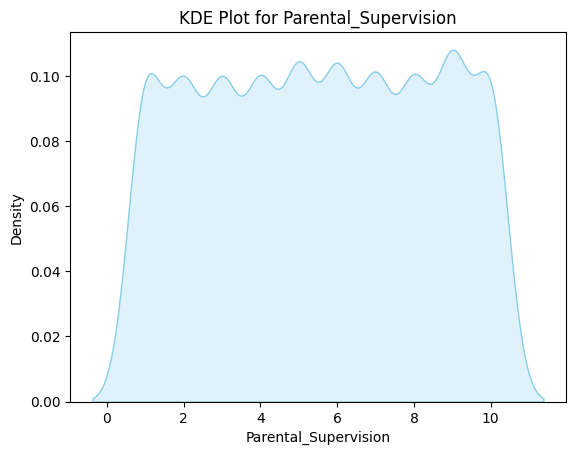

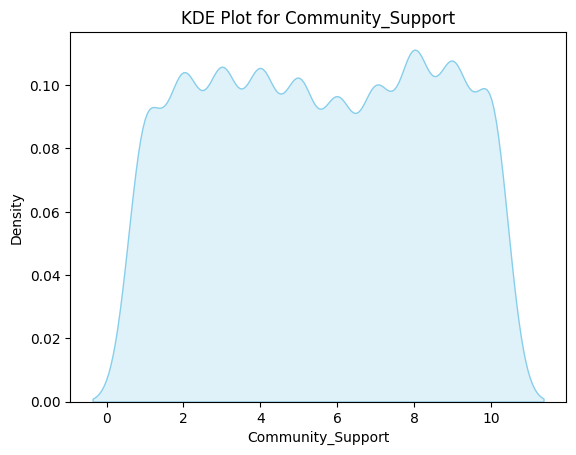

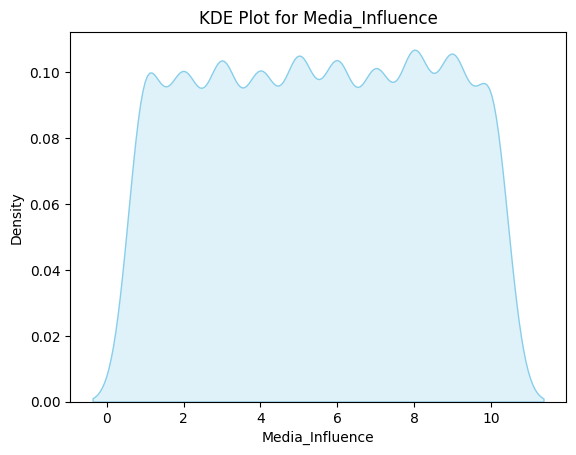

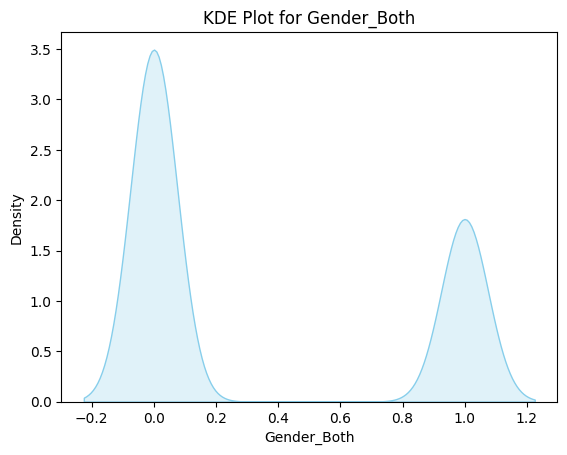

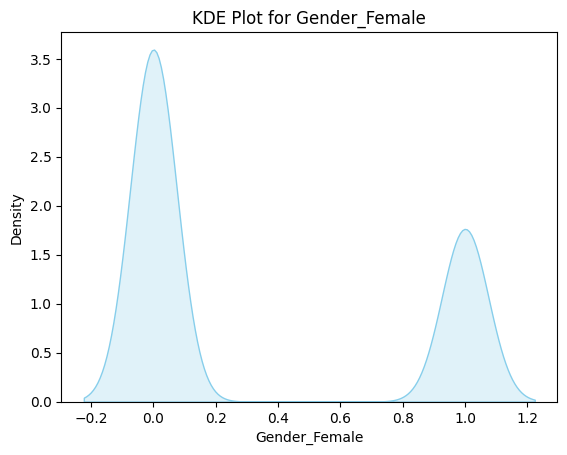

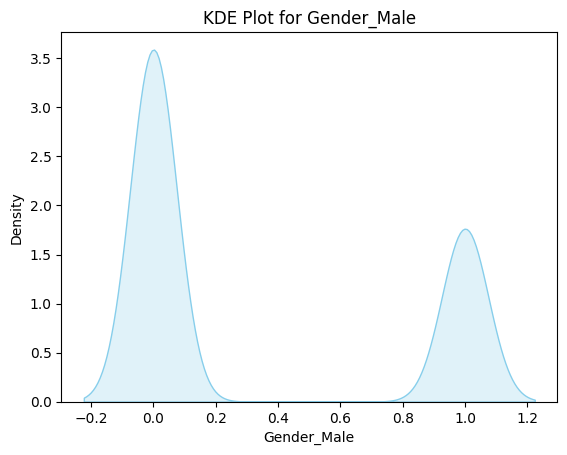

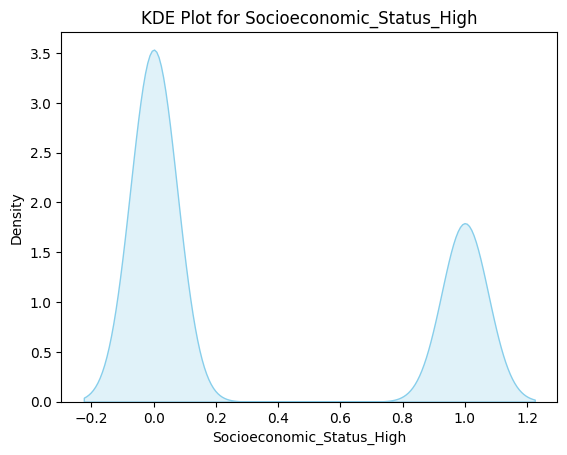

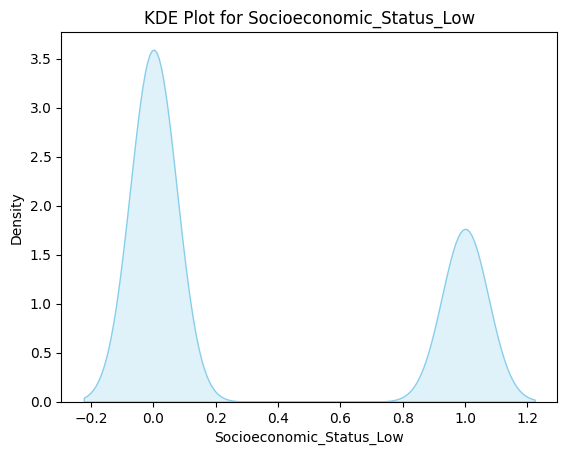

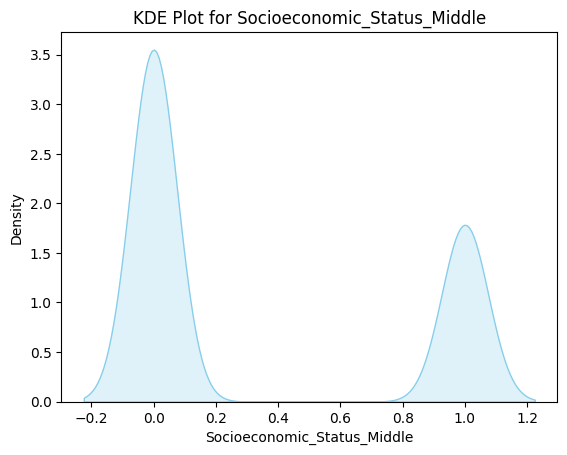

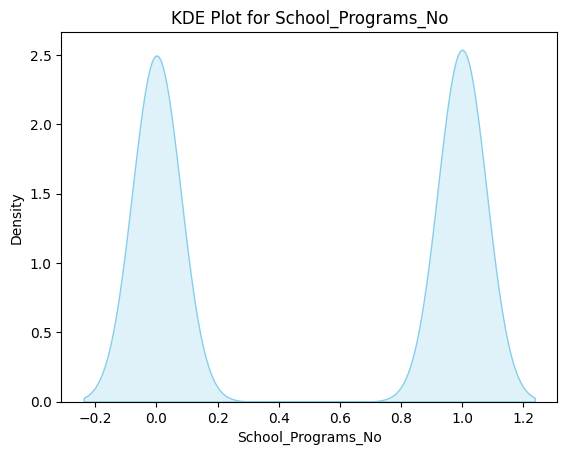

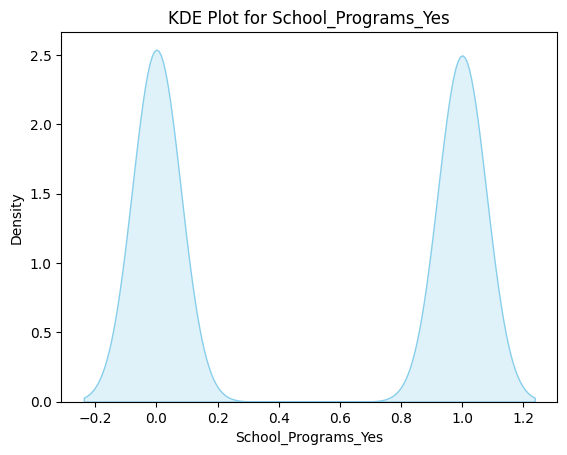

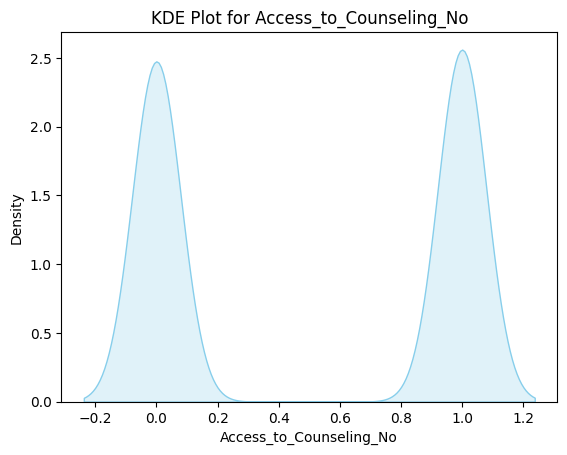

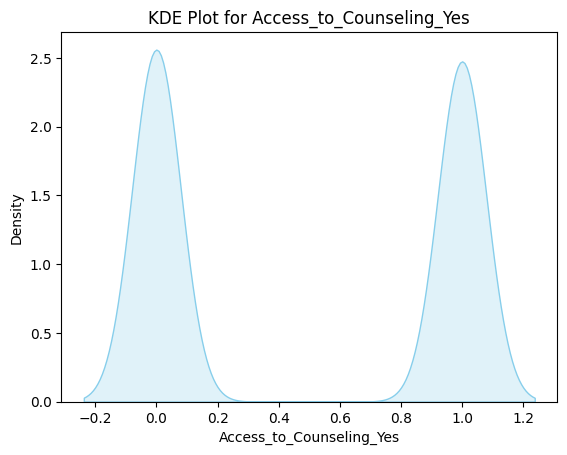

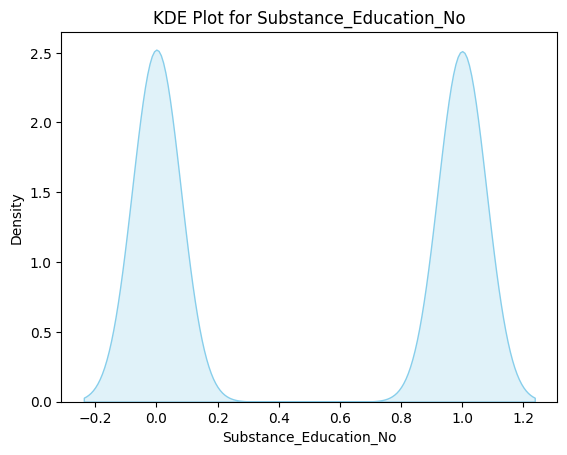

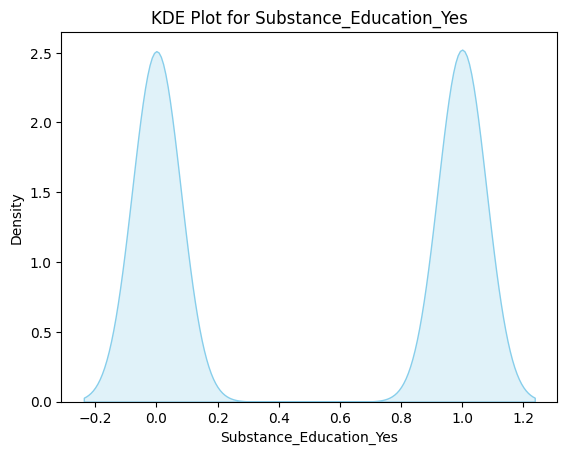

In [ ]:
# Assuming your DataFrame is named 'df'
numeric_cols = df.select_dtypes(include=np.number).columns

# Create a KDE plot for each numeric column
for col in numeric_cols:
    plt.figure()
    sns.kdeplot(df[col], fill=True, color='skyblue')
    plt.title(f'KDE Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

<ipython-input-536-3dd94c4ae1fe>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', len(categories))  # You can change 'viridis' to other colormaps
<ipython-input-536-3dd94c4ae1fe>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(category_data['Smoking_Prevalence'], category_data['Media_Influence'],


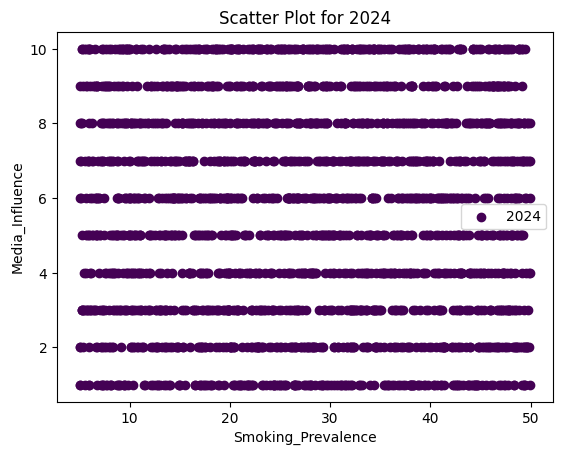

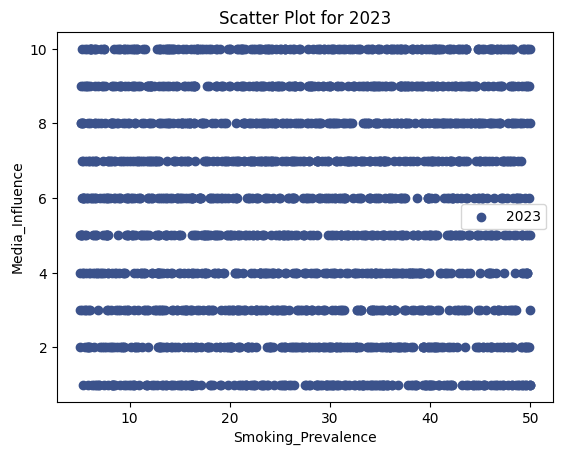

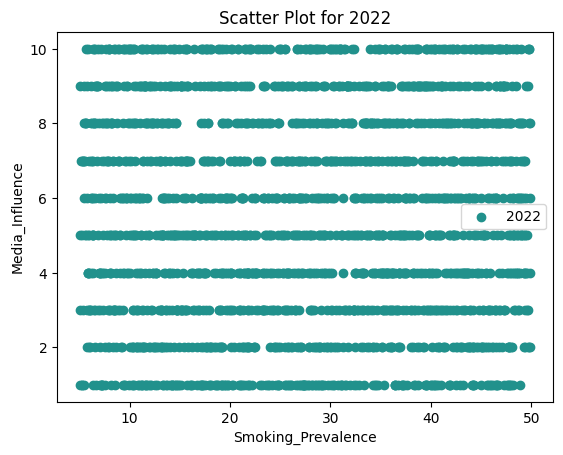

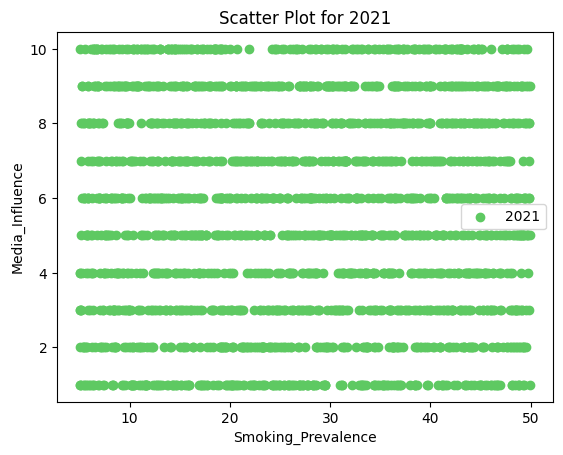

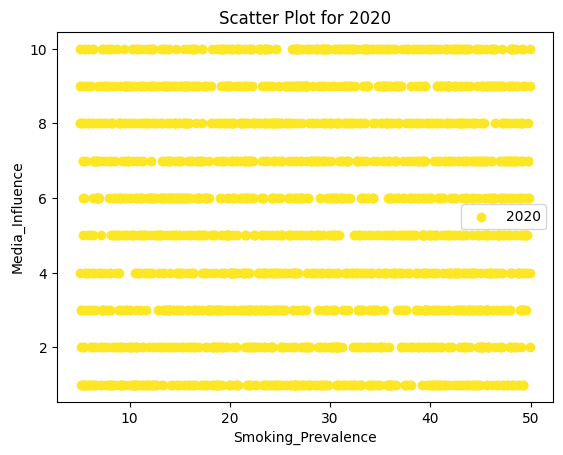

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap module

# Sample data (assuming you have a DataFrame named 'df')

# Choose a column that exists in your dataframe to use as a category
category_column = 'Year'

# Get unique categories from the chosen column
categories = df[category_column].unique()

# Generate a colormap with a distinct color for each category
colors = cm.get_cmap('viridis', len(categories))  # You can change 'viridis' to other colormaps

# Create separate scatter plots for each category with different colors
for i, category in enumerate(categories):
    category_data = df[df[category_column] == category]
    plt.figure()
    plt.scatter(category_data['Smoking_Prevalence'], category_data['Media_Influence'],
                label=category, c=colors(i))
    plt.xlabel('Smoking_Prevalence')
    plt.ylabel('Media_Influence')
    plt.title(f'Scatter Plot for {category}')
    plt.legend()
    plt.show()

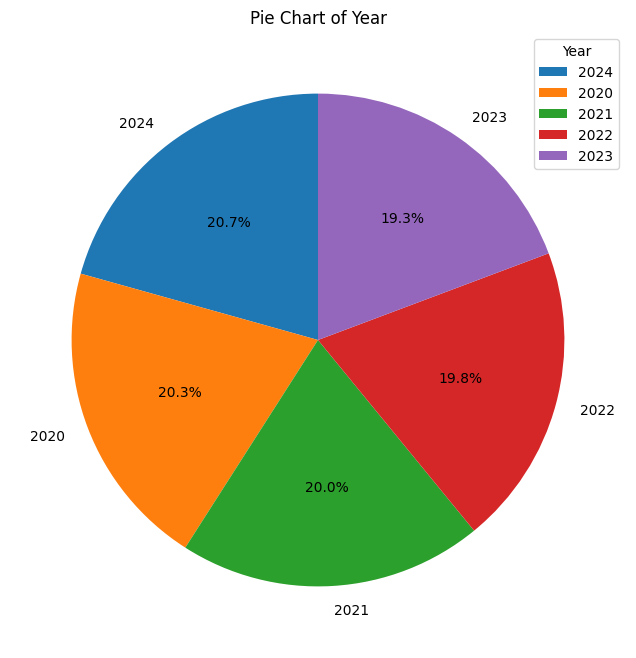

In [ ]:
# Assuming your DataFrame is named 'df'

# Calculate value counts for the 'Year' column
year_counts = df['Year'].value_counts()

# Create a pie chart for the 'Year' column
plt.figure(figsize=(8, 8))
plt.pie(year_counts,
        labels=year_counts.index,
        autopct='%1.1f%%',
        startangle=90)

# Add a title to the pie chart
plt.title('Pie Chart of Year')

# Add a legend
plt.legend(year_counts.index, title="Year", loc="best")

# Display the pie chart
plt.show()

# **5. Checking Skewness:**

In [ ]:
# Calculate skewness only for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df_skew = df[numeric_cols].skew()

# Display the skewness values
print(df_skew)

Year                           0.006794
Smoking_Prevalence             0.006650
Drug_Experimentation          -0.022252
Peer_Influence                 0.033047
Family_Background             -0.014566
Mental_Health                  0.012790
Parental_Supervision          -0.017099
Community_Support             -0.011652
Media_Influence               -0.013118
Gender_Both                    0.668577
Gender_Female                  0.727519
Gender_Male                    0.726074
Socioeconomic_Status_High      0.692624
Socioeconomic_Status_Low       0.727037
Socioeconomic_Status_Middle    0.702127
School_Programs_No            -0.016403
School_Programs_Yes            0.016403
Access_to_Counseling_No       -0.034010
Access_to_Counseling_Yes       0.034010
Substance_Education_No         0.004401
Substance_Education_Yes       -0.004401
dtype: float64


# **6.Feature Selection**

In [ ]:
numeric_features = x.select_dtypes(include=np.number).columns
x_numeric = x[numeric_features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numeric)
selector = SelectKBest(score_func=f_regression, k=20)
x_selected = selector.fit_transform(x_scaled, y)
selected_features = x.columns[selector.get_support(indices=True)]
print("Selected Features:", selected_features)
x_train, x_test, y_train, y_test = train_test_split(
    x_selected, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:",mse)
print("R-squared:",r2)

Selected Features: Index(['Year', 'Age_Group', 'Smoking_Prevalence', 'Peer_Influence',
       'Family_Background', 'Mental_Health', 'Parental_Supervision',
       'Community_Support', 'Media_Influence', 'Gender_Both', 'Gender_Female',
       'Gender_Male', 'Socioeconomic_Status_High', 'Socioeconomic_Status_Low',
       'Socioeconomic_Status_Middle', 'School_Programs_No',
       'School_Programs_Yes', 'Access_to_Counseling_No',
       'Access_to_Counseling_Yes', 'Substance_Education_No'],
      dtype='object')
Mean Squared Error: 323.6800104305115
R-squared: 0.00025198198604614586
